<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 2

### Problem 0 (3 points)

## Part 1: High-Dimensional Neighborhoods 

### Problem 1.1 (Exam Style)

Since each bin is the unit cube, the boundaries of $B_{ijk}$ will be at the faces (2-dimensional planes), edges (1-dimensional line segments) and vertices (0-dimensional points) since each surface of the bin will become a boundary of some type with one of its neighbors.

Since the faces must intersect in 2-dimensions with a neighbor sharing that boundary, 2 of the $ijk$ in its subscript must be the same as the $ijk$ in $B_{ijk}$. In 0+- notation, this means these boundaries will be all distinct combinations containing 2 0's and either a + or - for the final value.

Similarly, the edges must intersect in 1-dimension with a neighbor sharing that boundary, so these neighbors $ijk$ values will be all distinct combinations containing 1 0 and + or - in the other 2 values.

Since the vertices intersect in 0-dimensions with a neighbir sharing this boundary, the $ijk$ values of these neighbors will be all distinct combinations of + or - for all 3 values.

There are 6 faces in a cube, so $B_{ijk}$ has 6 2-dimensional boundaries which are: \
+00 $\;$  0+0  $\;$ 00+  $\;$ -00 $\;$  0-0  $\;$ 00-


There are 12 edges in a cube, so $B_{ijk}$ has 12 1-dimensional boundaries which are: \
++0 $\;$ +-0 $\;$ -+0 $\;$ --0 $\;$ +0+ $\;$ +0- $\;$ -0+ $\;$ -0- $\;$ 0++ $\;$ 0+- $\;$ 0-+ $\;$ 0--


There are 8 vertices in a cube, so $B_{ijk}$ has 8 0-dimensional boundaries which are: \
+++ $\;$ ++- $\;$ +-+ $\;$ -++ $\;$ +-- $\;$ -+- $\;$ --+ $\;$ ---


In total, $B_{ijk}$ has 26 neighbors

### Problem 1.2 (Exam Style)

$$
n(d,b)= 2^{d-b}
\left(\!
    \begin{array}{c}
      d \\
      d-b
    \end{array}
  \!\right)
$$

Explanation:

For the neighbors with $d$-dimensional boundaries, the number of 0's in the subscript of B is equal to the number of dimensions in the boundary $b$, and the number of non-zero subscipts is equal to $d-b$ since there will be $d$ total subscripts. A combination formula can be used to give the number of unique combination for 0 vs. non-zero spaces in the sequence of $d$ subscripts. This is the second part of the formula above. For each non-zero subscript there are then 2 possible choices (+ or -) at each location, and since there are a total of $d-b$ non-zero subscripts, $2^{d-b}$ is multiplied by the combination.

$$
m(d)= 3^{d} - 1
$$

Explanation:

There are 3 possible choices for each subscript (0, +, -) and since this choice is made $d$ times, $3^{d}$ gives the total number of combinations of those 3 choices. The choice where all subscripts are 0 is the bin $B_{i...d}$. Since $B_{i...d}$ is not a neighbor to itself, the all 0 combination is removed by subtracting 1.

$$
\begin{array}{c|c|*{5}{c}}
d & m(d) & n(d, 0) & n(d, 1) & n(d, 2) & n(d, 3) & n(d, 4) \\\hline
1 & 2 & 2 & - & - & - & - \\
2 & 8 & 4 & 4 & - & - & - \\
3 & 26 & 6 & 12 & 8 & - & - \\
4 & 80 & 16 & 32 & 24 & 8 & - \\
5 & 242 & 32 & 80 & 80 & 40 & 10 
\end{array}
$$

## Part 2: Random Gaussian Vectors 

### Problem 2.1

In [6]:
import numpy as np

def samples(n, d):
    var = 0.0
    if d == 1:
        var = np.sqrt(np.pi / 2)
    else:
        var = float(1 / np.sqrt(d-1))
    rng = np.random.default_rng()
    p = rng.normal(scale=var, size=(n, d))
    return p

In [7]:
def distances(p):
    r = np.linalg.norm(p, axis=1)
    return r

In [11]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

def decorate(x_label=None, y_label=None, title=None,
             line_width=3, font_size=24):
    for child in plt.gca().get_children():
        if isinstance(child, Line2D):
            plt.setp(child, linewidth=line_width)
    legend_handles, _ = plt.gca().get_legend_handles_labels()
    if len(legend_handles):
        plt.legend(fontsize=font_size)
    if x_label is not None:
        plt.xlabel(x_label, fontsize=font_size, labelpad=5)
    if y_label is not None:
        plt.ylabel(y_label, fontsize=font_size, labelpad=15)
    plt.xticks(fontsize=font_size//1.5)
    plt.yticks(fontsize=font_size//1.5)
    if title is not None:
        plt.title(title, fontsize=font_size)

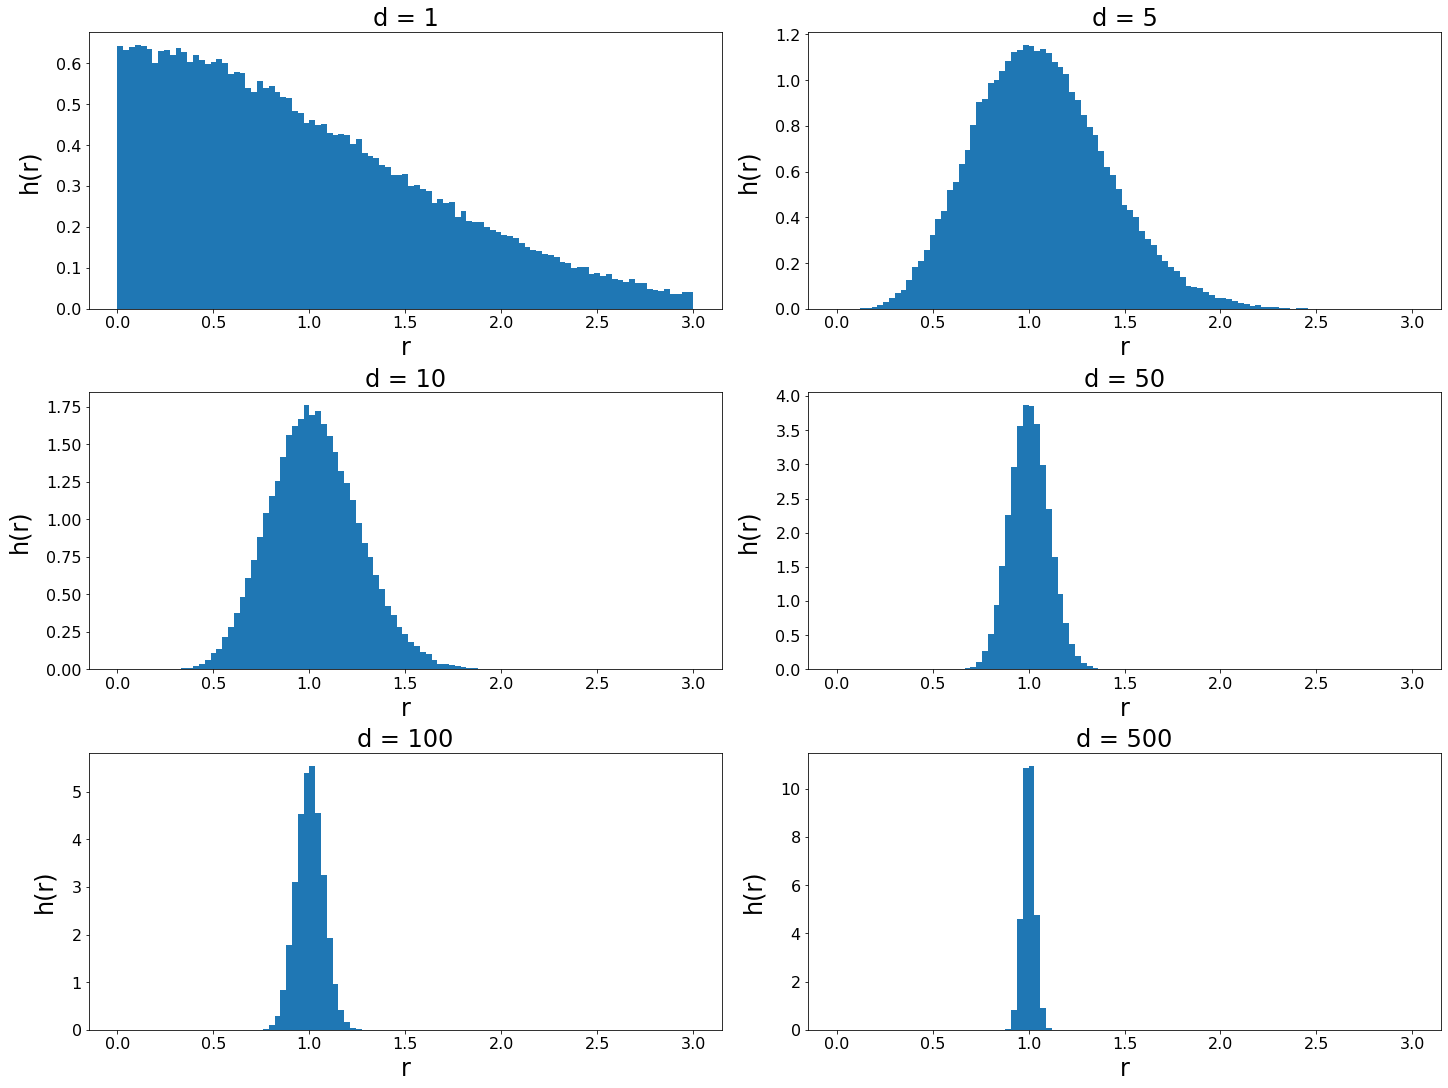

In [12]:
n = 100000
ds = (1, 5, 10, 50, 100, 500)
bins = np.linspace(0, 3, 100)
plt.figure(figsize=(20, 15), constrained_layout=True)
for plot, d in enumerate(ds):
    plt.subplot(3, 2, plot + 1)
    r = distances(samples(n, d))
    plt.hist(r, bins=bins, density=True)
    decorate('r', 'h(r)', title='d = {}'.format(d))
plt.show()

When $d$ is large, most of the Gaussian random points with mean 0 and mean norm of 1 are in a thin spherical shell of radius 1 centered at the origin.

## Part 3: Linear Separability and Voronoi Diagrams 

### Problem 3.1 (Exam Style)

$V$ is the set of all lines $x_{1} - b = 0$ where $b \in [2,5)$. 5 is not included in the set of possible values for $b$ since the line $x_{1} - 5 = 0$ would intersect points $u$ and $r$ which would make it a line that barely separates $T$. 2 is included however since the line $x_{1} - 2 = 0$ only intersects a single point (point $q$).

### Problem 3.2 (Exam Style)

$H$ is an empty set since there are no possible horizontal lines that separate $T$ without mistakes in classification since the range of $x_{2}$ values for points labeled 0 overlaps with the range of $x_{2}$ valuesfor points labeled 1. 

### Problem 3.3 (Exam Style)

u (5,4) & r (5,0):

$s(\mathbf{x}) = x_{1} - 5$

p (0,1) & q (2,3):
$$
(3-1)(x_{1}-0)=(2-0)(x_{2}-1) \\ 2x_{1} = 2x_{2} - 2 \\ 
s(\mathbf{x}) = 2x_{2} - 2x_{1} - 2 \\ s(\mathbf{x}) = x_{2} - x_{1} - 1 \\ 
s(\mathbf{x}) = x_{1} - x_{2} + 1
$$

p (0,1) & u (5,4):
$$
(4-1)(x_{1}-0)=(5-0)(x_{2}-1) \\ 3x_{1} = 5x_{2} - 5 \\
s(\mathbf{x}) = 5x_{2} - 3x_{1} - 5 \\ s(\mathbf{x}) = 3x_{1} - 5x_{2} + 5
$$

q (2,3) & r (5,0):

$$
(0-3)(x_{1}-2)=(5-2)(x_{2}-3) \\ -3x_{1} + 6 = 3x_{2} - 9 \\
s(\mathbf{x}) = 3x_{2} + 3x_{1} - 15 \\ s(\mathbf{x}) = x_{2} + x_{1} - 5
$$

### Problem 3.4 (Exam Style)

(a) There are 5 edges

(b) There are 2 points where 3 Voroni edges meet: (2,2) and (3,1)

(c) p & q: $\quad y = 2$
$ \\ \quad$ p & r: $\quad x + y - 4 = 0$
$\\ \quad$ p & s: $\quad x = 3$
$\\ \quad$ q & r: $\quad x = 2$ 
$\\ \quad$ r & s: $\quad x - 2y - 1 = 0$

## Part 4: Nearest Neighbors

In [14]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall21', course='371d', homework=2):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [15]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D


def decorate(x_label=None, y_label=None, title=None,
             line_width=3, font_size=24):
    for child in plt.gca().get_children():
        if isinstance(child, Line2D):
            plt.setp(child, linewidth=line_width)
    legend_handles, _ = plt.gca().get_legend_handles_labels()
    if len(legend_handles):
        plt.legend(fontsize=font_size)
    if x_label is not None:
        plt.xlabel(x_label, fontsize=font_size, labelpad=5)
    if y_label is not None:
        plt.ylabel(y_label, fontsize=font_size, labelpad=15)
    plt.xticks(fontsize=font_size//1.5)
    plt.yticks(fontsize=font_size//1.5)
    if title is not None:
        plt.title(title, fontsize=font_size)

Using previously downloaded file data.pkl


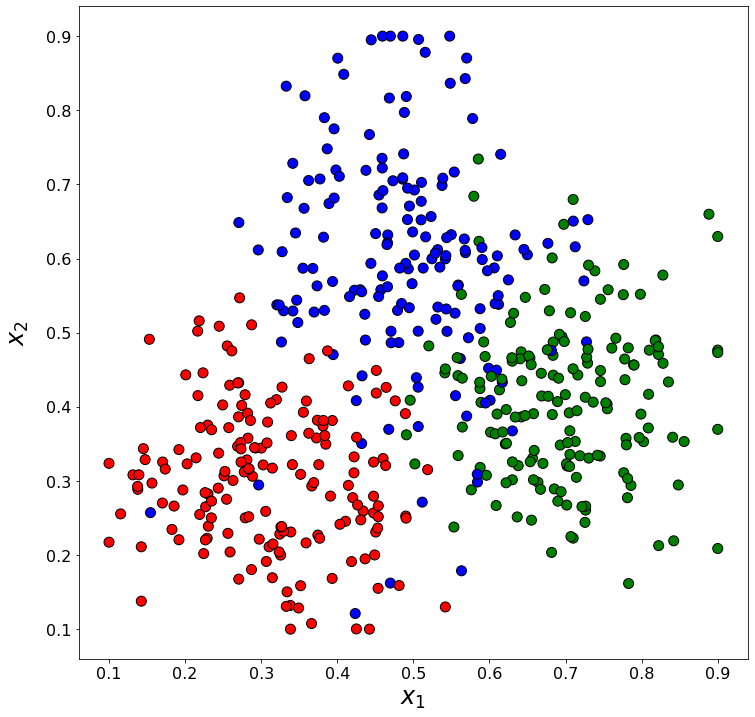

In [16]:
import pickle
from matplotlib.colors import ListedColormap



file_name = 'data.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    data = pickle.load(file)

plt.figure(figsize=(12, 12))
plt.scatter(data['x'][:, 0], data['x'][:, 1], marker='o',
            s=100, edgecolor='k', c=data['y'],
            cmap=ListedColormap(('r', 'g', 'b')))
decorate(x_label='$x_1$', y_label='$x_2$')
plt.show()

In [17]:
from sklearn.neighbors import NearestNeighbors


def neighbors(query_points, training_points, k):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(training_points)
    indices = nn.kneighbors(query_points, return_distance=False)
    return indices

In [18]:
def knn(query_points, training_samples, k, summary):
    indices = neighbors(query_points, training_samples['x'], k)
    return summary(training_samples['y'][indices])

### Problem 4.1

In [19]:
import numpy as np

n_grid = 200
grid_points = np.linspace(0., 1., n_grid)
xx, yy = np.meshgrid(grid_points, grid_points)
queries = np.stack((xx.flatten(), yy.flatten()), axis=1)

In [20]:
def p_label(ys):
    edges = [-0.5, 0.5, 1.5, 2.5]
    ps = [list(np.histogram(y, bins=edges, density=True)[0]) for y in ys]
    return np.array(ps)

In [22]:
def plot_y(y, plot_index, colormap, title):
    n = np.sqrt(y.size).astype(int)
    y = np.reshape(y, (n, n))
    plt.subplot(1, 3, plot_index + 1)
    plt.imshow(y, cmap=colormap, origin='lower')
    decorate(title=title)
    plt.axis('off')

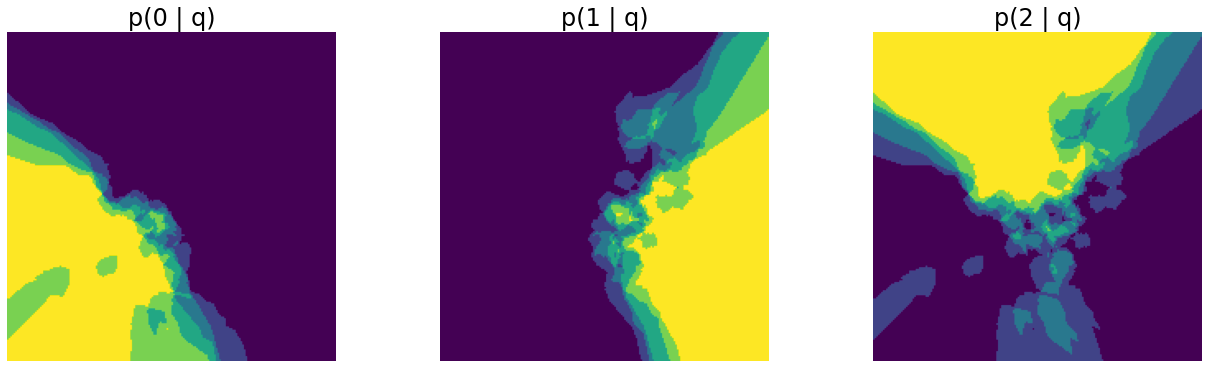

In [23]:
p = knn(queries, data, 5, p_label)
plt.figure(figsize=(18, 5), constrained_layout=True)
for y in range(3):
    plot_y(p[:, y], y, plt.cm.viridis, 'p({} | q)'.format(y))
plt.show()


### Problem 4.2

In [27]:
def majority(ys):
    return np.argmax(p_label(ys), axis=1)

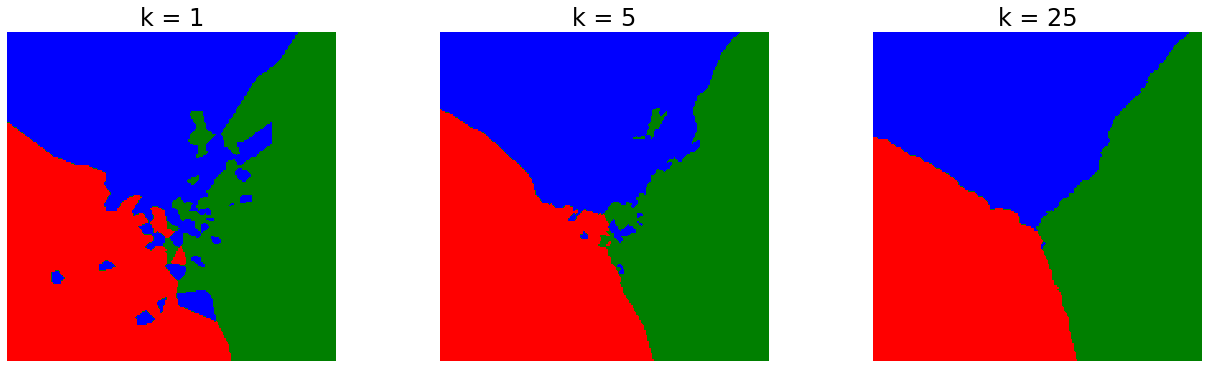

In [28]:
plt.figure(figsize=(18, 5), constrained_layout=True)
for plot, k in enumerate((1, 5, 25)):
    y_hat = knn(queries, data, k, majority)
    plot_y(y_hat, plot, ListedColormap(('r', 'g', 'b')), 'k = {}'.format(k))
plt.show()